Importing libraries

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt

Importing Dataset

In [12]:
mnist = tf.keras.datasets.mnist

Dividing dataset

In [13]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train,X_test = X_train/255.0, X_test/255.0
print("X_train.shape : ",X_train.shape) 

X_train.shape :  (60000, 28, 28)


Building Model

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

Compile model

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train model

In [39]:
x = model.fit(X_train,y_train,epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3424 - accuracy: 0.8997 - val_loss: 0.1534 - val_accuracy: 0.9542
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1795 - accuracy: 0.9474 - val_loss: 0.1136 - val_accuracy: 0.9662
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1427 - accuracy: 0.9581 - val_loss: 0.0928 - val_accuracy: 0.9717
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1203 - accuracy: 0.9640 - val_loss: 0.0872 - val_accuracy: 0.9744
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1107 - accuracy: 0.9656 - val_loss: 0.0793 - val_accuracy: 0.9768
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0969 - accuracy: 0.9696 - val_loss: 0.0747 - val_accuracy: 0.9781
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0890 - accuracy: 0.9726 - val_loss: 0.0739 - val_accuracy:

Get info

In [40]:
x.history

{'accuracy': [0.899733304977417,
  0.947433352470398,
  0.958050012588501,
  0.9639666676521301,
  0.9656166434288025,
  0.9695666432380676,
  0.9725666642189026,
  0.9732666611671448,
  0.9741833209991455,
  0.9759833216667175,
  0.9767666459083557,
  0.9780166745185852,
  0.9776999950408936,
  0.9800333380699158,
  0.9793499708175659,
  0.9816499948501587,
  0.9808833599090576,
  0.9815166592597961,
  0.9819333553314209,
  0.9826499819755554,
  0.9833999872207642,
  0.9831500053405762,
  0.9834166765213013,
  0.9842666387557983,
  0.9849500060081482,
  0.9844666719436646,
  0.9843833446502686,
  0.9855833053588867,
  0.9851999878883362,
  0.98580002784729,
  0.9856333136558533,
  0.9856500029563904,
  0.985966682434082,
  0.9871500134468079,
  0.9863666892051697,
  0.9871000051498413,
  0.9870499968528748,
  0.9867166876792908,
  0.9877833127975464,
  0.9878833293914795,
  0.9868833422660828,
  0.9875500202178955,
  0.9876333475112915,
  0.98785001039505,
  0.98785001039505,
  0.9881

In [41]:
acc = x.history['accuracy']
val_acc = x.history['val_accuracy']
loss = x.history['loss']
val_loss = x.history['val_loss']

Plot graph

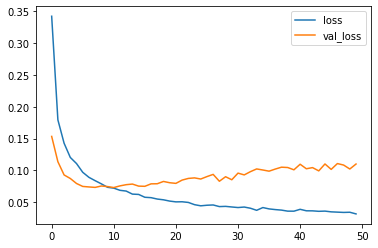

In [42]:
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.legend()

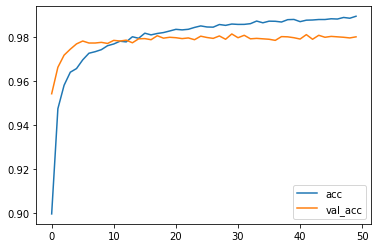

In [43]:
plt.plot(acc,label="acc")
plt.plot(val_acc,label='val_acc')
plt.legend()

Evaluate model

In [45]:
X_test.shape

(10000, 28, 28)

In [44]:
print(model.evaluate(X_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.1099 - accuracy: 0.9800
[0.10994844883680344, 0.9800000190734863]


Plot confusion matrix

Confusion matrix, without normalization
[[ 969    1    2    1    0    0    3    2    2    0]
 [   0 1126    3    1    0    1    2    1    1    0]
 [   2    2 1014    3    1    0    2    6    2    0]
 [   0    0    2  994    0    6    0    5    1    2]
 [   0    1    2    1  962    0    5    0    2    9]
 [   3    0    0   14    0  868    2    2    2    1]
 [   1    2    1    1    5    4  941    0    3    0]
 [   1    1   11    4    0    0    0 1006    0    5]
 [   3    1    3    6    4    5    2    6  941    3]
 [   1    4    0    7    7    3    0    6    2  979]]


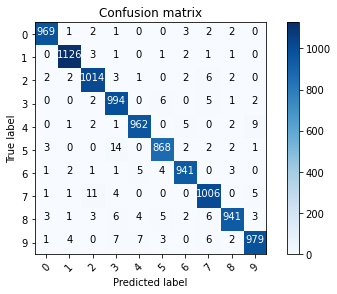

In [47]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


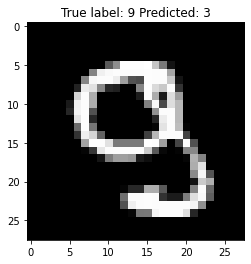

In [58]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));